Cyclomatic complexity (CYC) is a software metric used to determine the complexity of a program. It is a count of the number of decisions in the source code. The higher the count, the more complex the code. 
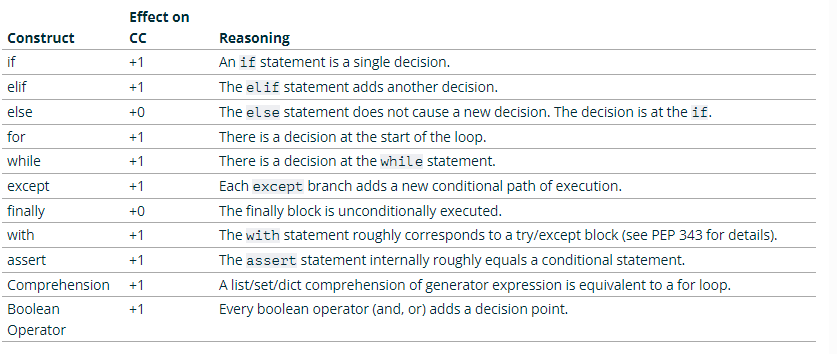

In [1]:
import ast

# This class contain method to count number of construct (mention above) and
# other SDP metric that are in the python file
class PythonFile:
  def __init__(self, filePath):
    self.filePath = filePath
    with open(self.filePath) as f:
      self.src = f.read()
    self.tree = ast.parse(self.src)
  
  # count the number of if and elif
  def countIf(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.If)])

  # count the number of for
  def countFor(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.For)])

  # count the number of while
  def countWhile(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.While)])

  # count the number of except
  def countExcept(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.ExceptHandler)])

  # count the number of with
  def countWith(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.With)])

  # count the number of assert
  def countAssert(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.Assert)])

  # count the number of comprehension
  def countComprehension(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.comprehension)])
  
  # count the number of boolean operator
  def countBooleanOperator(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.And) or isinstance(x, ast.Or)])

  # count the number of classes
  def countClasses(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.ClassDef)])

  # count the number of function
  def countFunction(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.FunctionDef)])

  # count the number of total operator
  def countOperator(self):
    return len([x for x in ast.walk(self.tree) if isinstance(x, ast.operator)])

  # count the number of unique operator
  def countUniqueOperator(self):
    return len({x for x in ast.walk(self.tree) if isinstance(x, ast.operator)})

  # count the line of code
  def countLOC(self):
    return sum(1 for line in open(self.filePath))
    
  def countBlankLine(self):
    with open(self.filePath, 'r') as file:
      return sum(line.isspace() for line in file)


In [2]:
# this classs count the total cyclomatic complexity(CC) of a file, or 
# the average of CC
class CyclomaticComplexity:
  def __init__(self, construct: PythonFile):
    self.ctr = construct
  
  def countTotalCC(self):
    ctr = self.ctr
    return (ctr.countIf() + ctr.countFor() + ctr.countWhile() + ctr.countExcept() + ctr.countWith() + ctr.countAssert() + ctr.countComprehension() + ctr.countBooleanOperator())

  # get average cc of a file by divide the total cc with number of function and class
  def countAverageCC(self):
    totalCC = self.countTotalCC()
    totalClass = self.ctr.countClasses()
    totalFunction = self.ctr.countFunction()
    return totalCC / (totalClass + totalFunction)


In [3]:
# random_data.py
randomData = PythonFile('random_data.py')
randomDataCC = CyclomaticComplexity(randomData)

randomDataLOC = randomData.countLOC()
randomDataBlankLine = randomData.countBlankLine()
randomDataTotalOperator = randomData.countOperator()
randomDataUniqueOperator = randomData.countUniqueOperator()

#Cyclomatic Complexity
randomDataTotalCC = randomDataCC.countTotalCC()
randomDataAvgCC = randomDataCC.countAverageCC()

In [4]:
import pandas as pd 

# random_data.py dataframe
data = {'File': 'random_data.py', 'LOC': randomDataLOC, 'Blank Line': randomDataBlankLine, 'Total CC': randomDataTotalCC, 'Avg CC': randomDataAvgCC, 'Total Operator': randomDataTotalOperator, 'Unique Operator': randomDataUniqueOperator}

randomDataDf = pd.DataFrame(data, index=[0])
randomDataDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,random_data.py,1235,129,62,1.347826,19,6


In [5]:
# promo_code.py
promoCode = PythonFile('promo_code.py')
promoCodeCC = CyclomaticComplexity(promoCode)

promoCodeLOC = promoCode.countLOC()
promoCodeBlankLine = promoCode.countBlankLine()
promoCodeTotalOperator = promoCode.countOperator()
promoCodeUniqueOperator = promoCode.countUniqueOperator()

#Cyclomatic Complexity
promoCodeTotalCC = promoCodeCC.countTotalCC()
promoCodeAvgCC = promoCodeCC.countAverageCC()

In [6]:
# promo_code dataframe
data = {'File': 'promo_code.py', 'LOC': promoCodeLOC, 'Blank Line': promoCodeBlankLine, 'Total CC': promoCodeTotalCC, 'Avg CC': promoCodeAvgCC, 'Total Operator': promoCodeTotalOperator, 'Unique Operator': promoCodeUniqueOperator}

promoCodeDf = pd.DataFrame(data, index=[0])
promoCodeDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,promo_code.py,50,14,4,0.5,0,0


In [7]:
# anonymization.py
anonymization = PythonFile('anonymization.py')
anonymizationCC = CyclomaticComplexity(anonymization)

anonymizationLOC = anonymization.countLOC()
anonymizationBlankLine = anonymization.countBlankLine()
anonymizationTotalOperator = anonymization.countOperator()
anonymizationUniqueOperator = anonymization.countUniqueOperator()

#Cyclomatic Complexity
anonymizationTotalCC = anonymizationCC.countTotalCC()
anonymizationAvgCC = anonymizationCC.countAverageCC()

In [8]:
# anonymization.py dataframe
data = {'File': 'anonymization.py', 'LOC': anonymizationLOC, 'Blank Line': anonymizationBlankLine, 'Total CC': anonymizationTotalCC, 'Avg CC': anonymizationAvgCC, 'Total Operator': anonymizationTotalOperator, 'Unique Operator': anonymizationUniqueOperator}

anonymizationDf = pd.DataFrame(data, index=[0])
anonymizationDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,anonymization.py,81,19,1,0.2,0,0


In [9]:
# draftjs.py
draftjs = PythonFile('draftjs.py')
draftjsCC = CyclomaticComplexity(draftjs)

draftjsLOC = draftjs.countLOC()
draftjsBlankLine = draftjs.countBlankLine()
draftjsTotalOperator = draftjs.countOperator()
draftjsUniqueOperator = draftjs.countUniqueOperator()

#Cyclomatic Complexity
draftjsTotalCC = draftjsCC.countTotalCC()
draftjsAvgCC = draftjsCC.countAverageCC()

In [10]:
# draftjs.py dataframe
data = {'File': 'draftjs.py', 'LOC': draftjsLOC, 'Blank Line': draftjsBlankLine, 'Total CC': draftjsTotalCC, 'Avg CC': draftjsAvgCC, 'Total Operator': draftjsTotalOperator, 'Unique Operator': draftjsUniqueOperator}

draftjsDf = pd.DataFrame(data, index=[0])
draftjsDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,draftjs.py,16,5,4,4.0,0,0


In [11]:
# json_serializer.py
jsonSerializer = PythonFile('json_serializer.py')
jsonSerializerCC = CyclomaticComplexity(jsonSerializer)

jsonSerializerLOC = jsonSerializer.countLOC()
jsonSerializerBlankLine = jsonSerializer.countBlankLine()
jsonSerializerTotalOperator = jsonSerializer.countOperator()
jsonSerializerUniqueOperator = jsonSerializer.countUniqueOperator()

#Cyclomatic Complexity
jsonSerializerTotalCC = jsonSerializerCC.countTotalCC()
jsonSerializerAvgCC = jsonSerializerCC.countAverageCC()

In [12]:
# json_serializer.py dataframe
data = {'File': 'json_serializer.py', 'LOC': jsonSerializerLOC, 'Blank Line': jsonSerializerBlankLine, 'Total CC': jsonSerializerTotalCC, 'Avg CC': jsonSerializerAvgCC, 'Total Operator': jsonSerializerTotalOperator, 'Unique Operator': jsonSerializerUniqueOperator}

jsonSerializerDf = pd.DataFrame(data, index=[0])
jsonSerializerDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,json_serializer.py,26,8,1,0.2,0,0


In [13]:
# translations.py
translations = PythonFile('translations.py')
translationsCC = CyclomaticComplexity(translations)

translationsLOC = translations.countLOC()
translationsBlankLine = translations.countBlankLine()
translationsTotalOperator = translations.countOperator()
translationsUniqueOperator = translations.countUniqueOperator()

#Cyclomatic Complexity
translationsTotalCC = translationsCC.countTotalCC()
translationsAvgCC = translationsCC.countAverageCC()

In [14]:
# translations.py dataframe
data = {'File': 'translations.py', 'LOC': translationsLOC, 'Blank Line': translationsBlankLine, 'Total CC': translationsTotalCC, 'Avg CC': translationsAvgCC, 'Total Operator': translationsTotalOperator, 'Unique Operator': translationsUniqueOperator}

translationsDf = pd.DataFrame(data, index=[0])
translationsDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,translations.py,30,6,3,0.5,0,0


In [15]:
# url.py
url = PythonFile('url.py')
urlCC = CyclomaticComplexity(url)

urlLOC = url.countLOC()
urlBlankLine = url.countBlankLine()
urlTotalOperator = url.countOperator()
urlUniqueOperator = url.countUniqueOperator()

#Cyclomatic Complexity
urlTotalCC = urlCC.countTotalCC()
urlAvgCC = urlCC.countAverageCC()

In [16]:
# url.py dataframe
data = {'File': 'url.py', 'LOC': urlLOC, 'Blank Line': urlBlankLine, 'Total CC': urlTotalCC, 'Avg CC': urlAvgCC, 'Total Operator': urlTotalOperator, 'Unique Operator': urlUniqueOperator}

urlDf = pd.DataFrame(data, index=[0])
urlDf

,File,LOC,Blank Line,Total CC,Avg CC,Total Operator,Unique Operator
0,url.py,35,6,4,2.0,0,0
